### 3.1.1 Introduction to Time Series Decomposition

Time series decomposition is an important analytical technique for time series analysis. It is useful for datasets that have seasonality. The method makes it possible to split up a time series into its fundamental components: trend, seasonality, and remainders. Therefore, a decomposition does not only give an understanding of the underlying patterns within the data, but also gives insight for interpreting subsequent analyses.

In the context of machine learning, the decomposition of time series is particularly useful. This approach separates the signal (trend and seasonality) from the stationary iid. signal and noise components, making it easier for predictive models like OLS and RF to focus on the more predictable parts of the data by a set of covariates. This is especially useful in forecasting scenarios where the ability to accurately predict future values can be substantially improved by understanding and modeling the underlying patterns in the data.

The application of time series decomposition in machine learning is diverse. It serves as a fundamental step in preprocessing, where the isolated components can be individually analyzed or utilized in various modeling. For instance, the trend component can be used to understand long-term directions in the data, while the seasonal component explains recurring patterns over intervals, i.e., daily or yearly. The remainder component, which is the remaining component obtained after removing seasonal and trend components, holds crucial insight into the volatility and irregularities in the data. This is important when assessing model performance and robustness. Predicting residuals allows the model to capture underlying patterns such as variance that does not come from the seasonality or the trend component. These components each capture different aspects of the variance; however, there will still be some remaining variance which can be explained by the remainders. The remainders make it possible to quantify this uncaptured variance in predictions and by doing so improve the accuracy of the forecasting. (Hyndman & Athanasopoulos, 2018)

### 3.1.2 STL Decomposition

The following section will shed light on specific decomposition methods, with a focus on STL (Seasonal and Trend decomposition using Loess) and MSTL (Multiple Seasonal and Trend decomposition using Loess). These techniques offer sophisticated frameworks for decomposing time series data and can handle complex patterns including multiple seasonalities, which are increasingly prevalent in modern time series data. Since it has increased frequencies due to databases that can be updated more frequently than just once a month, the incorporation of more powerful computers and the internet can provide more frequent datapoints.

STL decomposition deconstructs a time series, \( Y_t \), into three fundamental components, providing an understanding of the data’s underlying patterns over time. At first, the method isolates the trend component, \( T_t \), which captures the long-term progression or decline in the series, reflecting whether there is an increase or decline in the data, representing changes that are not due to systematic or seasonal variations. In the context of energy consumption, this could be underlying consumer habits and behavior that might change over time. Next, it extracts the seasonal component \( S_t \), which identifies recurring patterns or variation that happen at regular intervals, which provides information on the systematic behavior of the data. Lastly, the remaining component \( R_t \) is determined, representing the irregular or random variation that cannot be attributed to the trend or seasonal factors. The decomposition can be written as:

\[ Y_t = T_t + S_t + R_t \]

where \( Y_t \) is the original time series, \( T_t \) is the trend component, \( S_t \) is the seasonal component, and \( R_t \) is the remaining component at time \( t \).

#### 3.1.2.1 Understanding Locally Estimated Scatterplot Smoothing (Loess)

This section delves deeper into the mathematical intricacies of each component, with a particular focus on the Loess (Locally Estimated Scatterplot Smoothing) technique, which is integral to the STL process. (STL: A Seasonal-Trend Decomposition Procedure Based on LOESS - ProQuest, n.d.)

Loess, or Locally Estimated Scatterplot Smoothing, utilizes local polynomial regression, typically with quadratic polynomials, to create a nuanced approximation of the data. Quadratic polynomials are favored due to their flexibility in fitting a wide array of data shapes, adeptly balancing the need for a close fit and avoiding overfitting. For each data point \( x \), Loess fits a quadratic polynomial by considering the points within a defined neighborhood, weighted by their proximity, using the tri-cube weight function:

\[ w(x, x_i) = \left( 1 - \left| \frac{x - x_i}{h} \right|^3 \right)^3 \]

In the formula above, \( x_i \) are the neighboring data points, and \( h \) is the bandwidth that determines the extent of the neighborhood. This weight function ensures that closer points have more influence on the regression outcome, providing a tailored fit at each point in the series.

#### 3.1.2.2 Trend Component \( T_t \)

The trend component, \( T_t \), in STL decomposition is extracted using Loess smoothing. For each point in the series, Loess fitting involves selecting a subset of data points around the target point, weighted by their proximity, to fit a low-degree polynomial. 

The trend component \( T_t \) is extracted through Loess smoothing across the time series. The sensitivity of \( T_t \) to short-term fluctuations is modulated by the bandwidth \( h \). A larger \( h \) smooths over a broader swath of data, capturing more generalized trends and reducing sensitivity to short-term variations:

\[ \min_{\beta_0, \beta_1, \beta_2} \sum_{i=1}^{n} w(x, x_i) \left( Y_t - \beta_0 - \beta_1 x_i - \beta_2 x_i^2 \right)^2 \]

where \( \beta_0, \beta_1, \beta_2 \) are the coefficients of the local quadratic polynomial fitted at \( x \). \( w(x, x_i) \) represents the weight of the \( i \)-th data point when estimating the trend at time \( t \). The solution to this minimization problem gives the trend estimate \( T_t \) at each point. (STL: A Seasonal-Trend Decomposition Procedure Based on LOESS - ProQuest, n.d.)


#### 3.1.2.3 Seasonal Component \( S_t \)

Post-detrending, the seasonal component \( S_t \) is isolated by applying Loess to the detrended data. This process is replicated for each cycle, ensuring the seasonality is consistent and robust throughout the series. The seasonal effects are normalized to ensure that their sum over one cycle equals zero, distinguishing them from the trend component:

\[ \sum_{i=1}^{n} S_{t_i} = 0 \]

This constraint ensures the seasonality is only cyclical without influencing the trend’s direction.

#### 3.1.2.4 Remaining Component \( R_t \)

The residual component is calculated as the difference between the sum of the observed series and the sum of the estimated trend and seasonal components:

\[ R_t = Y_t - T_t - S_t \]

which encapsulates the data's unexplained variance after removing the trend and seasonality. Analyzing \( R_t \) can unveil insights into the model's fit, highlighting outliers or anomalous data points that deviate from the established pattern.

#### 3.1.2.5 Iterative Refinement

The iterative aspect of STL refines \( T_t \) and \( S_t \) by using the remainders from the previous iteration to adjust the fit, enhancing the decomposition's accuracy over iterations. This iterative process is important for capturing the nuances in both the trend and seasonal components, especially in the presence of complex and evolving time series patterns.

#### 3.1.2.6 Visual Representation

To explain the STL decomposition process, a visual representation is made to illustrate the idea of the method. For these purposes, a time series was simulated, which encapsulates a linearly ascending trend, seasonal fluctuation, and some random noise to try and demonstrate what one might expect from the real world.


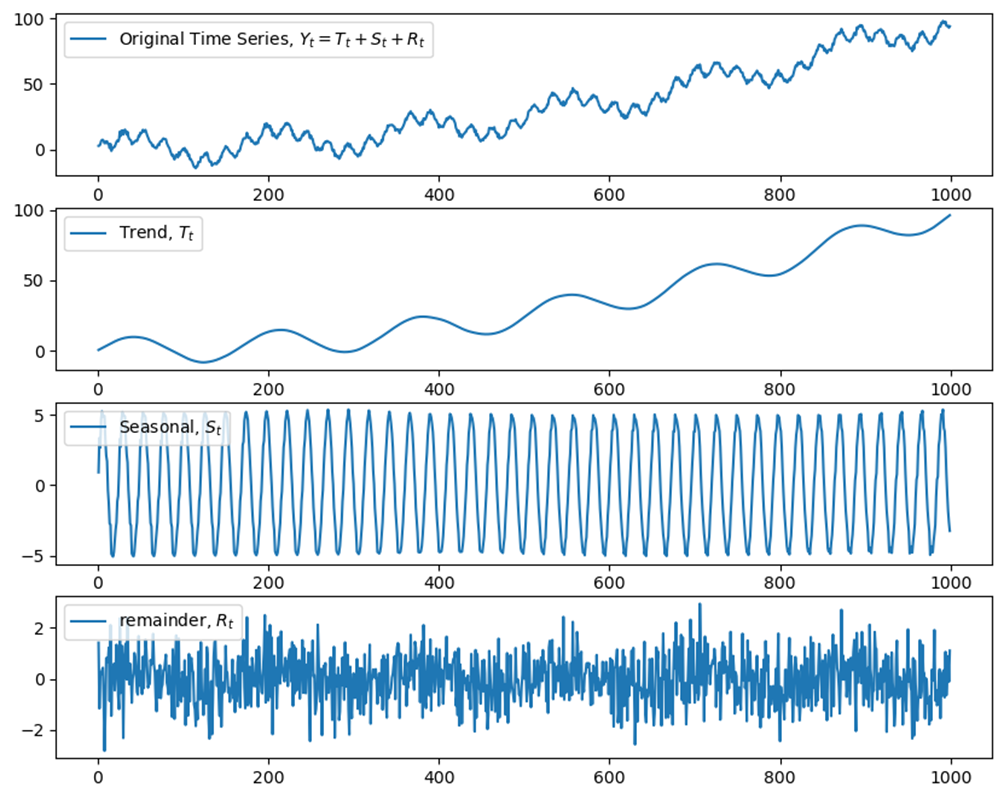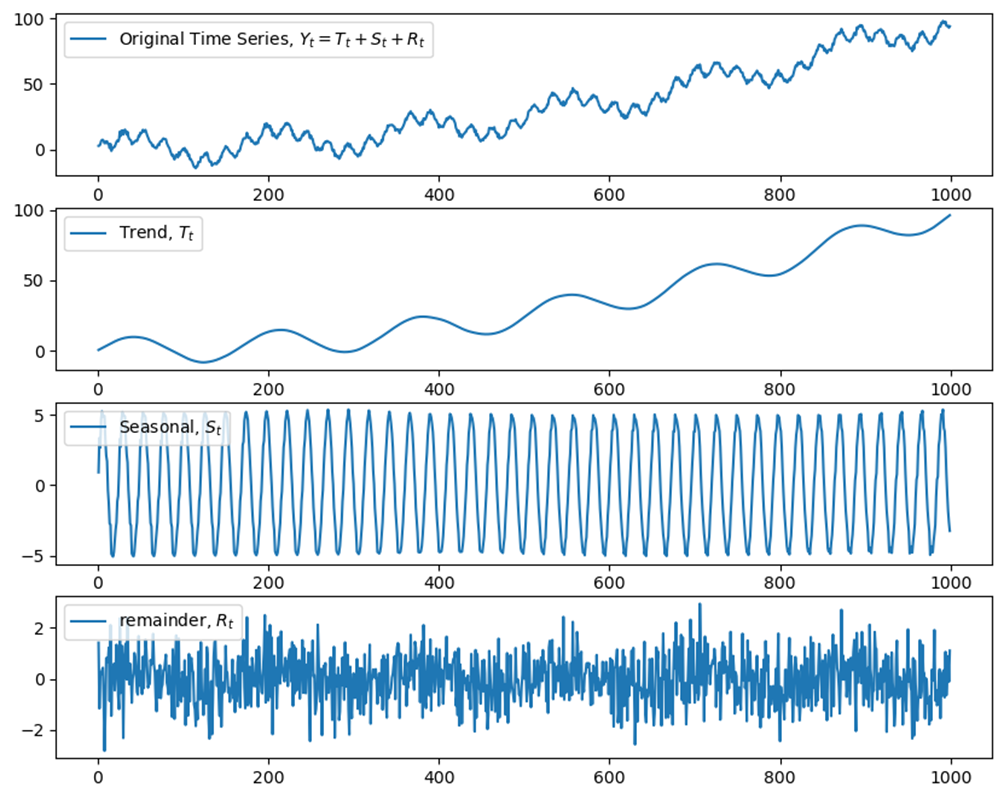

In figure 1, the uppermost plot portrays the original simulated time series \( Y_t \), which is built from trend, seasonality, and noise. It's the raw, unrefined essence of observational data. Beneath it lies the trend component \( T_t \), which should illustrate a steady upward trajectory, unswayed by the fluctuations of periodic patterns. However, due to the multiple seasonal components in the time series, it has periodic patterns, which is why STL is not sufficient for this thesis. The next chapter will look into how to handle multiple seasonalities as energy consumption contains.

The next plot captures the seasonal component \( S_t \), swinging periodically to reflect the imposed periodicity. This rhythmic pattern is indicative of seasonal variations, such as increased energy use in winter months due to, among other things, heating demands. It is a visual of predictable, recurrent behaviors within the data.

Lastly, the remaining component \( R_t \) signifies the irregularities and stochastic deviations that the trend and seasonal models have not captured. Examining the remainders closely can disclose valuable insights into the nuances of the data, potentially discovering outliers or anomalous events that stand apart from the expected pattern.

Although this is a constructed example, it still gives an idea of how one can analyze the visualization of STL decomposition. By looking at visualizations of a time series, one might discover distinct patterns and observe what different components tell. Therefore, it is important for understanding the underlying structure of the dataset. As observed in the remaining component, there remains an element of seasonality, which can be attributed to our focus solely on annual seasonality, while potentially overlooking daily seasonality in our underlying data. 

Furthermore, this suggests the necessity for employing Multiple Seasonal-Trend decomposition using Loess (MSTL) to address data characterized by more than one seasonal component.

#### 3.1.2.7 Multi-Seasonal Time Series Decomposition (MSTL)

The Multiple Seasonal-Trend Decomposition (MSTL) algorithm improves time series analysis by building on the seasonal and trend decomposition using Loess (STL). It introduces an automated, additive approach to handle multiple seasonal cycles in data. MSTL's functionality lies in its iterative use of STL to accurately estimate and separate these cycles. It also offers control over the smoothness of seasonal changes, managing both deterministic and stochastic variations.

MSTL extends the concepts of STL, applying an additive model to decompose a time series observation at time \( t \), \( Y_t \), into a trend, seasonal components, and remainder:

\[ Y_t = S_t^1 + S_t^2 + \cdots + S_t^n + T_t + R_t \]

where \( S_t^i \) denotes the seasonal component, \( T_t \) the trend, and \( R_t \) the remainder, similar to STL. The multiple seasonal components make the MSTL approach able to handle time series with multiple seasonal components, which is present in energy consumption. The algorithm begins by determining the seasonal patterns within the time series, identifying and arranging these in ascending order. In cases of non-seasonal time series, MSTL focuses on computing the trend and remainder, applying other smoothing techniques such as Friedman's Super Smoother (Bandara et al., 2022).


Firstly, the ´na.interp´ is used for any missing data in the time series. This is done to ensure that the subsequent analyses are carried out on the complete data. Secondly, if the user specifies the Box Cox transformation, then it is used to modify the data such that it fits an additive decomposition model. 
When the data is preprocessed, the decomposition begins. The initial phase of decomposition involves the extraction of each seasonal component. This is done through the application of STL. To ensure the maximum accuracy of the seasonal components, the algorithm starts with the shortest periods, such as daily data, and then progresses to longer periods, such as weekly and yearly data. This approach allows to isolate and remove the shorter seasonal patterns before examining the longer patterns.

After the initial round of seasonal extraction, each component is roughly estimated, and the time series is temporarily de-seasonalized. In the second phase of decomposition, the algorithm reintegrates and re-extract each seasonal component to improve them. This iterative process, which involves adding and subtracting of components from the de-seasonalized time series, finds a more precise estimate of each seasonal component.

The last component of the extract in the STL fit is the trend, which is acquired after uncovering the longest periodic component. The remaining component, representing what remains after removing both the seasonal effects and the trend, is calculated by subtracting the trend from the de-seasonalized time series.
In cases where time series lack seasonal components, the MSTL directly smoothens the time series to derive a trend component, without extracting any seasonal components. This adjustment is suitable for handling time series where seasonal variation is irrelevant, but where an overarching trend is still of interest for analysis.

Unlike STL, which is limited to a single seasonal decomposition MSTL can handle cases with multiple seasonalities by identifying each of the seasonality components. This makes MSLT more accurate when dealing with time series that have different seasonal factors which may even overlay. MSTL is also known for its computational efficiency which gives it an advantage over other decomposition methods like Fourier series analysis. Fourier series analysis might struggle with larger datasets and multiple frequencies compared to MSTL which can handle data swiftly. This makes MSTL a good practical choice for larger datasets. Especially, if the models used are used for real-time monitoring (Bandara et al 2022).
This means that if the MSTL algorithm explained above gets applied to the timeseries from figure 1, then it should be able to capture both the seasonal components:


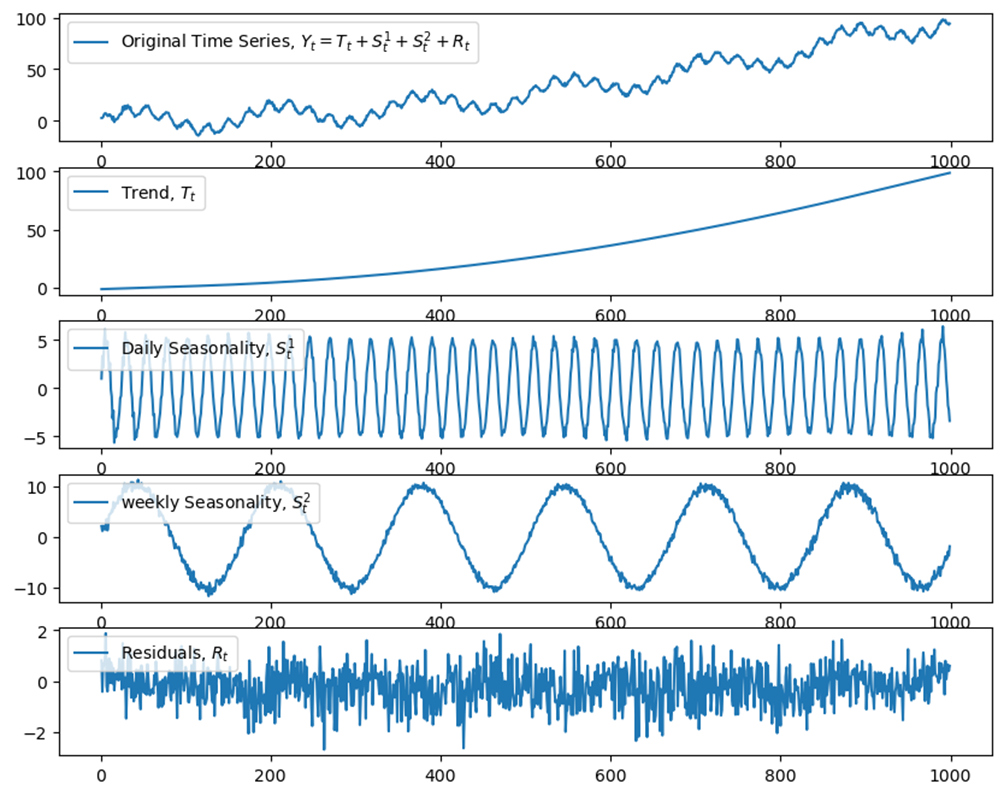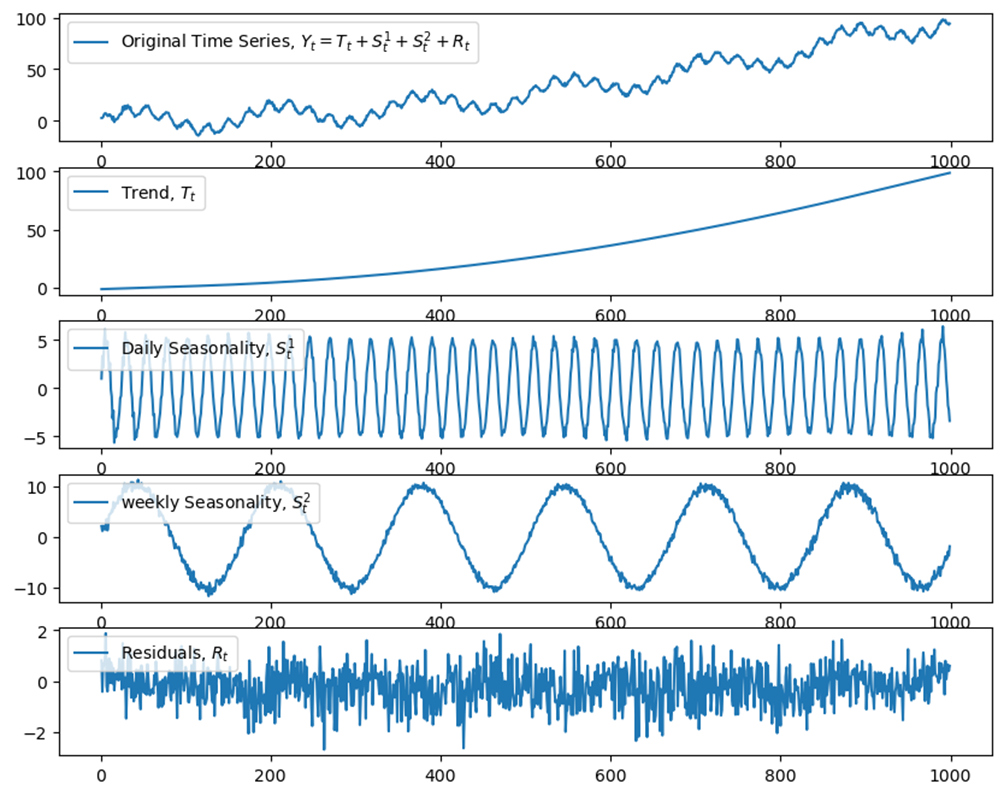

hen the MSTL algorithm is applied to the same time series that STL was unable to completely decompose, as seen in Figure 1, the trend now illustrates a steady upward trajectory, unswayed by the fluctuations of periodic patterns. Furthermore, this periodic pattern that was left in the trend in Figure 1 can now be seen as its own component, \( S_t^2 \). This shows MSTL's ability to decompose time series that contain more than one seasonal component, and therefore its relevance in forecasting energy consumption.
